In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [3]:
data = pd.read_csv('CleanData2.csv').drop(['Unnamed: 0', 'index'], axis=1)
print data.shape
print data.dtypes
data.head()

(35143, 14)
State                object
Area                 object
Year                  int64
UnemploymentRate    float64
Change              float64
Region               object
LHS                 float64
HS                  float64
SC                  float64
BD                  float64
Pop_Est             float64
Int_Mig_Rate        float64
Dom_Mig_Rate        float64
MedianIncome        float64
dtype: object


,State,Area,Year,UnemploymentRate,Change,Region,LHS,HS,SC,BD,Pop_Est,Int_Mig_Rate,Dom_Mig_Rate,MedianIncome
0,AL,Alabama,2007,4.0,NaN,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42212.0
1,AL,Alabama,2008,5.7,1.7,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44476.0
2,AL,Alabama,2009,11.0,5.3,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39980.0
3,AL,Alabama,2010,10.5,-0.5,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40933.0
4,AL,Alabama,2011,9.6,-0.9,South,NaN,NaN,NaN,NaN,4798649.0,0.9,-0.5,42590.0


**Look at the unemployment rate as a time series. How has the overall unemployment rate changed over the time period, and how does the change in each region compare with the overall change?**

In [4]:
# Group the data by region and find the mean unemployment rate for each year
years = data.Year.unique() 
us_means = data.groupby(['Year']).mean().reset_index().UnemploymentRate
region_data = data.groupby(['Region', 'Year']).mean().reset_index()
s_means = region_data[region_data.Region=='South'].UnemploymentRate
ne_means = region_data[region_data.Region=='Northeast'].UnemploymentRate
mw_means = region_data[region_data.Region=='Midwest'].UnemploymentRate
w_means = region_data[region_data.Region=='West'].UnemploymentRate

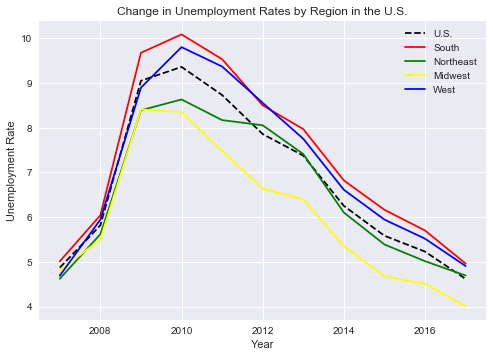

In [5]:
# Plot the data for each region and for the U.S. 
plt.plot(years, us_means, color='black', linestyle='dashed', label='U.S.')
plt.plot(years, s_means, color='red', label='South')
plt.plot(years, ne_means, color='green', label='Northeast')
plt.plot(years, mw_means, color='yellow', label='Midwest')
plt.plot(years, w_means, color='blue', label='West')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Change in Unemployment Rates by Region in the U.S.')
plt.legend()
plt.savefig('UnemploymentRateChange.png')

plt.show()

**The plot shows a large increase in unemployment rates overall from 2008 to 2009. I would like to know if any individual areas did not have an increase in unemployment rates over this time period. I will use the Change column to answer this question, and count the number of areas for which the change was non-positive in 2009. I will also count the regions for which the change was positive, and calculate the percentages.**

In [6]:
# Find regions where the unemployment rate did not increase in 2009
n_count = 0
p_count = 0
for i in data.index:
    if data.Year[i] == 2009 and data.Change[i] <= 0:
        n_count += 1
    if data.Year[i] == 2009 and data.Change[i] > 0:
        p_count += 1
pct = float(n_count)/(p_count + n_count)

print n_count
print pct

21
0.00661000944287


**We can see that only 21 areas did not see an increase in unemployment rate from 2008 to 2009. This is only about 0.66 percent of the areas in the U.S.**

**I would like to look more at the unemployment rates for each region. What does the distribution look like for each region, and how do the regions compare to each other? I will construct boxplots and histograms to answer these questions.**

In [7]:
# Construct a list of the unemployment rates for each region
s_rates = [data.UnemploymentRate[i] for i in data.index if data.Region[i] == 'South']
ne_rates = [data.UnemploymentRate[i] for i in data.index if data.Region[i] == 'Northeast']
mw_rates = [data.UnemploymentRate[i] for i in data.index if data.Region[i] == 'Midwest']
w_rates = [data.UnemploymentRate[i] for i in data.index if data.Region[i] == 'West']

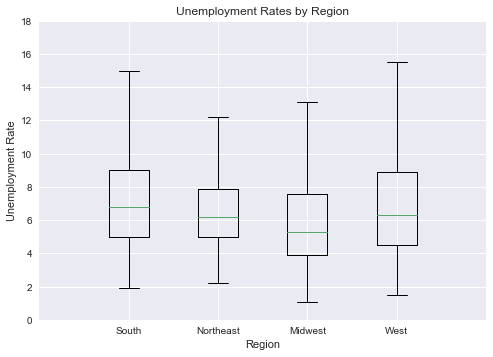

In [8]:
# Construct a boxplot for each region
plot_data = [s_rates, ne_rates, mw_rates, w_rates]
fig1, ax1 = plt.subplots()
ax1.set_title('Unemployment Rates by Region')
_ = plt.boxplot(plot_data, labels=['South', 'Northeast', 'Midwest', 'West'])
plt.axis([0, 5, 0, 18])
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.savefig('UnemploymentRatesBoxPlot.png')
plt.show()

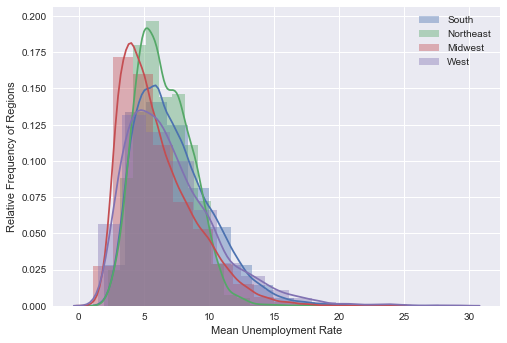

In [9]:
# Construct histograms to compare the distributions for the regions
bn = 15
plotdata2 = [s_rates, ne_rates, mw_rates, w_rates]
sns.distplot(s_rates, bins=bn, label='South')
sns.distplot(ne_rates, bins=bn, label='Northeast')
sns.distplot(mw_rates, bins=bn, label='Midwest')
sns.distplot(w_rates, bins=bn, label='West')
plt.xlabel('Mean Unemployment Rate')
plt.ylabel('Relative Frequency of Regions')
plt.legend()
plt.show()

**Now I will plot the distribution of several states from each region to see if they are similar to the distributions for the regions.**

['VA', 'AR', 'DE']


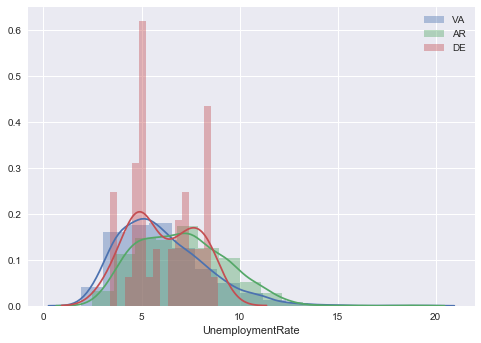

In [14]:
# Look at the distribution of unemployment rates for several states in the South region
s_states = data[data.Region=='South'].State.unique()
nums = range(0, len(s_states))
rand_num = np.random.choice(nums, 3, replace=False)

rand_states = []
for i in rand_num:
    rand_states.append(s_states[i])
    
print rand_states

for i in rand_states:
        sns.distplot(data[data.State==str(i)].UnemploymentRate, bins=15, label=str(i))
        
plt.legend()             
plt.show()

['VT', 'RI', 'MA']


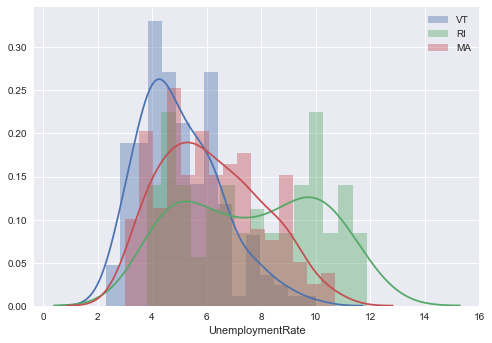

In [15]:
# Look at the distribution of unemployment rates for several states in the Northeast region
ne_states = data[data.Region=='Northeast'].State.unique()
nums = range(0, len(ne_states))
rand_num = np.random.choice(nums, 3, replace=False)

rand_states = []
for i in rand_num:
    rand_states.append(ne_states[i])
    
print rand_states

for i in rand_states:
        sns.distplot(data[data.State==str(i)].UnemploymentRate, bins=15, label=str(i))
        
plt.legend()             
plt.show()

['MO', 'IA', 'MN']


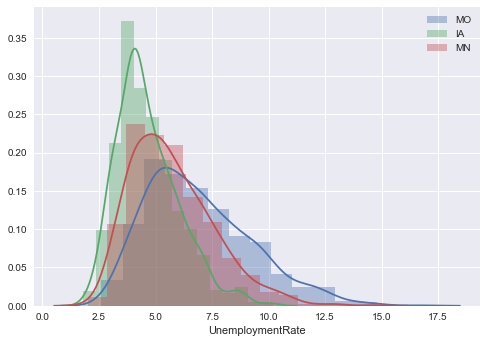

In [16]:
# Look at the distribution of unemployment rates for several states in the Midwest region
mw_states = data[data.Region=='Midwest'].State.unique()
nums = range(0, len(mw_states))
rand_num = np.random.choice(nums, 3, replace=False)

rand_states = []
for i in rand_num:
    rand_states.append(mw_states[i])

print rand_states

for i in rand_states:
        sns.distplot(data[data.State==str(i)].UnemploymentRate, bins=15, label=str(i))
        
plt.legend()             
plt.show()

['WA', 'AK', 'OR']


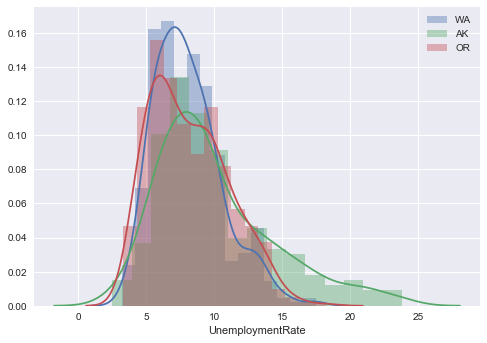

In [17]:
# Look at the distribution of unemployment rates for several states in the West region
w_states = data[data.Region=='West'].State.unique()
nums = range(0, len(w_states))
rand_num = np.random.choice(nums, 3, replace=False)

rand_states = []
for i in rand_num:
    rand_states.append(w_states[i])
    
print rand_states

for i in rand_states:
        sns.distplot(data[data.State==str(i)].UnemploymentRate, bins=15, label=str(i))
        
plt.legend()             
plt.show()

<p>**There is significant variation between the distributions for the states, but most of them appear to be positively skewed.**</p>
<p>**I would like to investigate whether there is a correlation between median income and unemployment rates. The data only includes median income for states, not for individual counties.**</p>

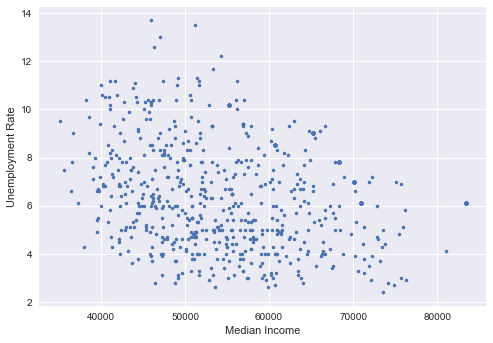

In [18]:
x = [data.MedianIncome[i] for i in data.index if data.MedianIncome[i]>0]
y = [data.UnemploymentRate[i] for i in data.index if data.MedianIncome[i]>0]

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Median Income')
plt.ylabel('Unemployment Rate')
plt.savefig('MedianIncomeScatterPlot.png')
plt.show()

In [18]:
r = np.corrcoef(x,y)
print r[0,1]

-0.148707342812


**There appears to be a downward trend on the scatterplot. The correlation coefficient is - 0.36, so there is a negative correlation between Median Income and Unemployment Rate. This means that states with a higher median income tend to have lower unemployment rates.**

**I would also like to know whether there is a correlation between education level and unemployment rates. **

In [19]:
recent_years = [2012, 2013, 2014, 2015, 2016]
d = [data.Year[i] in recent_years for i in data.index]

recent_data = data[d]
new_data = recent_data.loc[:][['Year', 'UnemploymentRate', 'LHS', 'HS', 'SC', 'BD']]

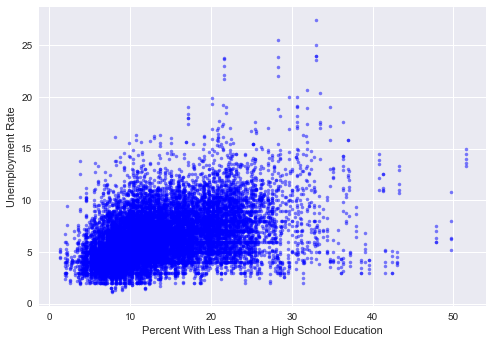

In [20]:
plt.plot(new_data.LHS, new_data.UnemploymentRate, marker='.', color='blue', linestyle='none', alpha=0.5)
plt.xlabel('Percent With Less Than a High School Education')
plt.ylabel('Unemployment Rate')
plt.show()

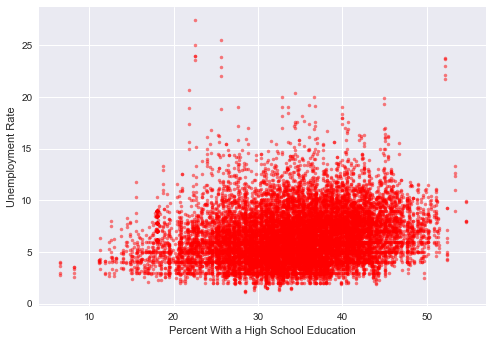

In [21]:
plt.plot(new_data.HS, new_data.UnemploymentRate, marker='.', color='red', linestyle='none', alpha=0.5)
plt.xlabel('Percent With a High School Education')
plt.ylabel('Unemployment Rate')
plt.show()

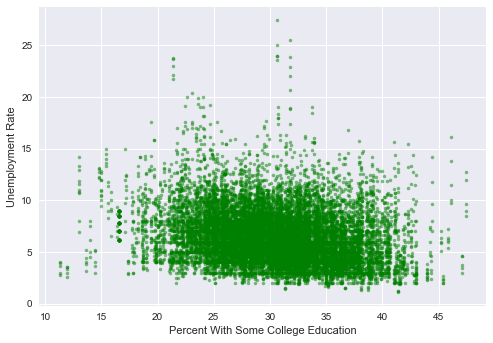

In [22]:
plt.plot(new_data.SC, new_data.UnemploymentRate, marker='.', color='green', linestyle='none', alpha=0.5)
plt.xlabel('Percent With Some College Education')
plt.ylabel('Unemployment Rate')
plt.show()

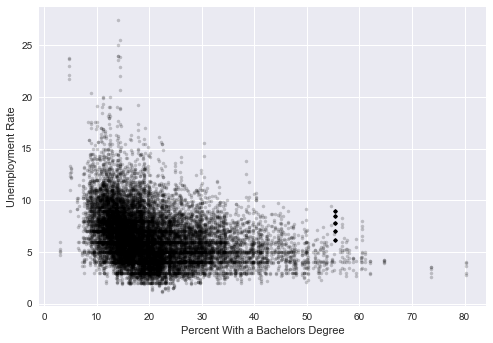

In [23]:
plt.plot(new_data.BD, new_data.UnemploymentRate, marker='.', color='black', linestyle='none', alpha=0.2)
plt.xlabel('Percent With a Bachelors Degree')
plt.ylabel('Unemployment Rate')
plt.show()

<p>**These plots show some interesting trends. On the first plot, there appears to be a positive correlation. Areas that have a higher percentage of the population with less than a high school education tend to have higher unemployment rates. On the 2nd plot, there also appears to be a positive correlation, but not as obvious as the first. In the 3rd and 4th plots, there appears to be a negative correlation. This means that areas where a larger proportion of the population has a college education tend to have lower unemployment rates.**</p>

<p>**To further investigate the trends seen in the previous plots, we can look at the correlation between all pairs of variables. First we need to encode the categorical variables. Then we will print the correlation matrix.**</p>

In [24]:
# Encode the categorical data
data.Region = data.Region.astype('category')
data['RegionCode'] = data.Region.cat.codes
data.State = data.State.astype('category')
data['StateCode'] = data.State.cat.codes
data.Area = data.Area.astype('category')
data['AreaCode'] = data.Area.cat.codes

In [25]:
data.head()

,State,Area,Year,UnemploymentRate,Change,Region,LHS,HS,SC,BD,Pop_Est,Int_Mig_Rate,Dom_Mig_Rate,MedianIncome,RegionCode,StateCode,AreaCode
0,AL,Alabama,2007,4.0,NaN,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42212.0,2,1,9
1,AL,Alabama,2008,5.7,1.7,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44476.0,2,1,9
2,AL,Alabama,2009,11.0,5.3,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39980.0,2,1,9
3,AL,Alabama,2010,10.5,-0.5,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40933.0,2,1,9
4,AL,Alabama,2011,9.6,-0.9,South,NaN,NaN,NaN,NaN,4798649.0,0.9,-0.5,42590.0,2,1,9


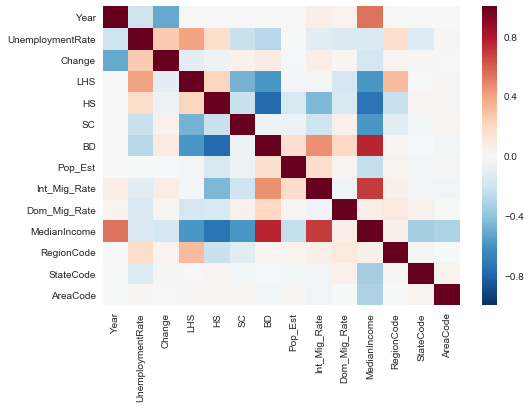

In [26]:
r2 = data.corr()
sns.heatmap(r2)
plt.show()

<p>**The correlation coefficients confirm our observations from the plots. For 'Percent with less than high school' and Unemployment Rate, the correlation coefficient is about 0.4, so there is a positive correlation. For 'Percent with a high school education', the correlation is not as strong, but there is a slight positive correlation. For 'Percent with some college', there is a weak negative correlation with Unemployment Rate, and for 'Percent with a Bachelor's degree, there is a slightly stronger negative correlation.**</p>
<p>**As seen earlier, there is a negative correlation between Median Income and Unemployment Rate. Also, there appears to be a weak correlation between migration rates and unemployment rates. There appears to be almost no correlation between population and unemployment rates.**</p>

In [28]:
# Drop migration rate columns
cleaned_data = data.drop(['Int_Mig_Rate', 'Dom_Mig_Rate'], axis=1)
# Export the data to a file
cleaned_data.to_csv('CleanDataEncoded.csv')